<a href="https://colab.research.google.com/github/MN-AI-2019/Semester2/blob/master/DigitRecog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#A simple network to classify handwritten digits
![alt text](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)

![3 layer neural network](http://neuralnetworksanddeeplearning.com/images/tikz12.png)

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import random
#dataset
from keras.datasets import mnist
import cv2

Using TensorFlow backend.


**Class to build the neural network**

In [0]:
class Network(object):

    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        if test_data: n_test = len(test_data)
        n = len(training_data)
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [training_data[k:k+mini_batch_size] for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print ("Epoch {0}: {1} / {2}".format(j, self.evaluate(test_data), n_test))
            else:
                print ("Epoch {0} complete".format(j))

    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = (activations[-1]- y) * sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)
    

![alt text](https://cdn-images-1.medium.com/max/1200/1*Xu7B5y9gp0iL5ooBj7LtWw.png)

In [0]:
#### Miscellaneous functions
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

**Load training data**

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [7]:
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)
print (x_train[10])
print (y_train[10])

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0 

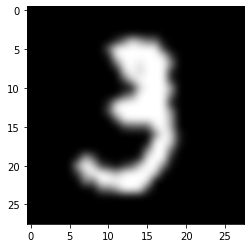

In [11]:
plt.imshow(x_train[10],cmap = 'gray', interpolation = 'bicubic')
plt.show()

**Prepare the data**

In [0]:
x_train_norm=x_train/255.0
x_test_norm=x_test/255.0

training_inputs = [np.reshape(x, (784, 1)) for x in x_train_norm]
training_results = [vectorized_result(y) for y in y_train]
training_data = list(zip(training_inputs, training_results))

test_inputs = [np.reshape(x, (784, 1)) for x in x_test_norm]
test_data = list(zip(test_inputs, y_test))

**Training**

In [18]:
input=28*28
hidden1=30
#hidden2=15
output=10
net = Network([input, hidden1, output])

epochs=30
mini_batch_size=10
learning_rate=3
net.SGD(training_data, epochs, mini_batch_size, learning_rate, test_data=test_data)

Epoch 0: 9098 / 10000
Epoch 1: 9244 / 10000
Epoch 2: 9310 / 10000
Epoch 3: 9353 / 10000
Epoch 4: 9365 / 10000
Epoch 5: 9456 / 10000
Epoch 6: 9440 / 10000
Epoch 7: 9451 / 10000
Epoch 8: 9457 / 10000
Epoch 9: 9460 / 10000
Epoch 10: 9394 / 10000
Epoch 11: 9442 / 10000
Epoch 12: 9466 / 10000
Epoch 13: 9469 / 10000
Epoch 14: 9466 / 10000
Epoch 15: 9485 / 10000
Epoch 16: 9507 / 10000
Epoch 17: 9484 / 10000
Epoch 18: 9485 / 10000
Epoch 19: 9506 / 10000
Epoch 20: 9485 / 10000
Epoch 21: 9472 / 10000
Epoch 22: 9503 / 10000
Epoch 23: 9501 / 10000
Epoch 24: 9498 / 10000
Epoch 25: 9474 / 10000
Epoch 26: 9479 / 10000
Epoch 27: 9490 / 10000
Epoch 28: 9492 / 10000
Epoch 29: 9493 / 10000


**Test**

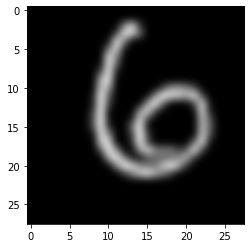

[[6.00215295e-05]
 [8.04520243e-09]
 [1.09167807e-03]
 [1.00781996e-08]
 [4.04028126e-04]
 [1.00349407e-13]
 [9.99575799e-01]
 [5.09149937e-09]
 [1.43061513e-04]
 [3.06031421e-04]]
6
6


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
test_img=x_test[100]
plt.imshow(test_img,cmap = 'gray', interpolation = 'bicubic')
plt.show()
test_img=np.reshape(test_img, (784, 1))
test_result=net.feedforward(test_img)
print (test_result)
print(np.argmax(test_result))
print(y_test[100])

**Upload your own handwritten digits**

In [19]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [20]:
!ls "/content/drive/My Drive/openAI_gym"
!pwd


0.bmp  3.bmp  6.bmp  9.bmp	   DigitRecog.ipynb  openAI_display.ipynb
1.bmp  4.bmp  7.bmp  cartpole	   frozenlake.ipynb
2.bmp  5.bmp  8.bmp  cartPole_tpu  gameAI.ipynb
/content


In [0]:
my_img = cv2.imread('drive/My Drive/openAI_gym/5.bmp',0)

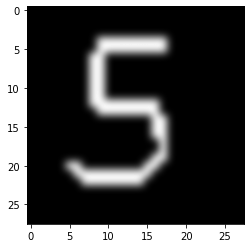

In [44]:
plt.imshow(my_img,cmap = 'gray', interpolation = 'bicubic')
plt.show()

In [45]:
test_result=net.feedforward(np.reshape(my_img/255.0, (784, 1)))
print(np.argmax(test_result))

5


In [39]:
print (net.weights[0].shape)
print (net.biases[0].shape)
print (net.weights[0])
print (net.biases[0])

(30, 784)
(30, 1)
[[-1.75276365  0.9550844  -0.10534645 ...  0.15904716  1.37865546
  -0.7576167 ]
 [ 1.07477181 -0.07169738  0.49752336 ... -1.30315868 -1.75799926
  -0.48572074]
 [ 0.22662221 -0.7956676   0.15630962 ...  0.8464122   0.25944406
  -0.1576777 ]
 ...
 [-1.22426808 -0.11933691  0.42697515 ...  0.7842748   1.22278063
   0.31220853]
 [ 0.46950869 -1.1076115   0.78198627 ...  0.51036074  1.09607922
   0.11335892]
 [ 0.39773731  0.11224946  0.65257419 ... -0.49464479  0.13974661
  -0.96160051]]
[[ 2.09142109]
 [-1.62009373]
 [-6.90317108]
 [ 2.84630459]
 [-3.95976031]
 [ 2.33243156]
 [-2.61192835]
 [ 3.18659523]
 [-1.17897349]
 [-1.76793876]
 [-2.31781752]
 [-3.09126793]
 [-2.04132636]
 [-4.62262243]
 [-2.31946409]
 [-1.48731195]
 [ 2.27520009]
 [-1.99239283]
 [-2.09018709]
 [-2.13546064]
 [ 0.57839363]
 [-6.21098243]
 [ 1.01507125]
 [-3.09496792]
 [-1.32954938]
 [ 1.56683607]
 [-1.24792621]
 [-0.50202067]
 [ 5.9766647 ]
 [ 0.15925709]]
